In [3]:
import pandas as pd
!pip install sqlalchemy
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter, MultipleLocator

In [4]:
df = pd.read_csv('/Users/sumayyashahul/Downloads/car_price_project/CAR_DETAILS csv.csv')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [7]:
df['car_age'] = 2025 - df['year']

In [8]:
df = df.sort_values(by = ['year','selling_price'],ascending = [True,True]).reset_index(drop=True)

In [9]:
df['Brand'] = df['name'].apply(lambda x:x.split()[0])
df.rename(columns={'name':'model'},inplace=True)
df['model'] = df['model'].apply(lambda x:' '.join(x.split(' ')[1:]))

In [10]:
df.isnull().sum()

model            0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
car_age          0
Brand            0
dtype: int64

In [11]:
df = df.drop('car_age', axis = 1)

In [12]:
df = df[['Brand','model','year','km_driven','fuel','seller_type','transmission','owner','selling_price']]
df.head()

,Brand,model,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti,800 AC BSII,1992,100000,Petrol,Individual,Manual,Fourth & Above Owner,50000
1,Maruti,Gypsy E MG410W ST,1995,100000,Petrol,Individual,Manual,Second Owner,95000
2,Mahindra,Jeep MM 540,1996,60000,Diesel,Individual,Manual,First Owner,200000
3,Mahindra,Jeep CL 500 MDI,1996,35000,Diesel,Individual,Manual,Second Owner,250000
4,Maruti,800 Std,1997,80000,Petrol,Individual,Manual,Second Owner,50000


In [13]:
model = df['model'].value_counts()
model.columns = ['model','Count']
print(model)

model
Swift Dzire VDI                    69
Alto 800 LXI                       59
Alto LXi                           47
Alto LX                            35
EON Era Plus                       35
                                   ..
Sail 1.3 LS                         1
Manza Club Class Quadrajet90 LX     1
Wagon R CNG LXI                     1
i20 Magna Optional 1.2              1
A5 Sportback                        1
Name: count, Length: 1491, dtype: int64


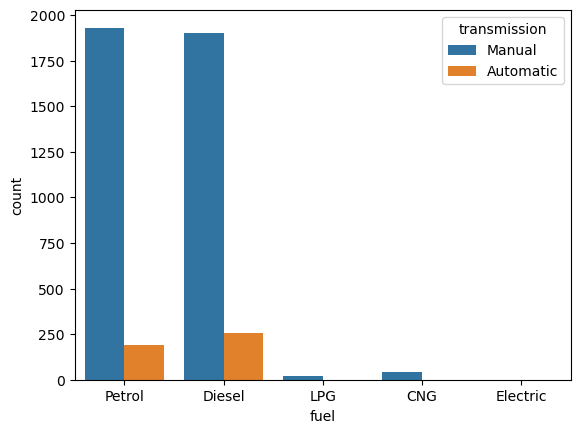

In [14]:
fuel_fig = sns.countplot(df, x = "fuel",hue = "transmission")

<Figure size 1000x600 with 0 Axes>

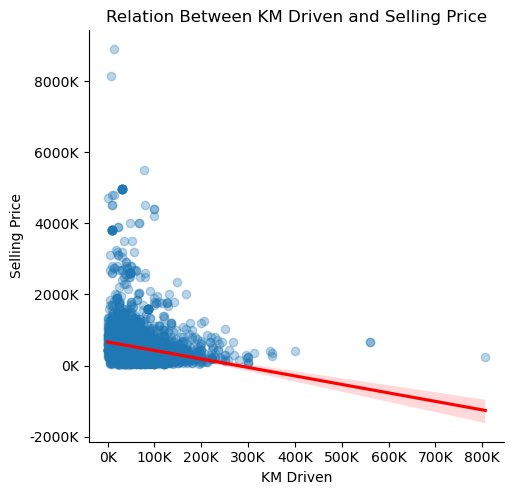

In [15]:
plt.figure(figsize = (10,6))

def thousand_formatter(x, pos):
    return f'{int(x/1000)}K'
    
g = sns.lmplot(data = df, x="km_driven", y = "selling_price", scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title("Relation Between KM Driven and Selling Price")
plt.xlabel("KM Driven")
plt.ylabel("Selling Price")


g.ax.xaxis.set_major_formatter(ticker.FuncFormatter(thousand_formatter))

g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(thousand_formatter))


plt.show()

/var/folders/sk/0zc48mfx21q8yxnxb5yw0jnc0000gn/T/ipykernel_3085/483170851.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x= 'fuel', y = 'selling_price', palette = 'Set2')


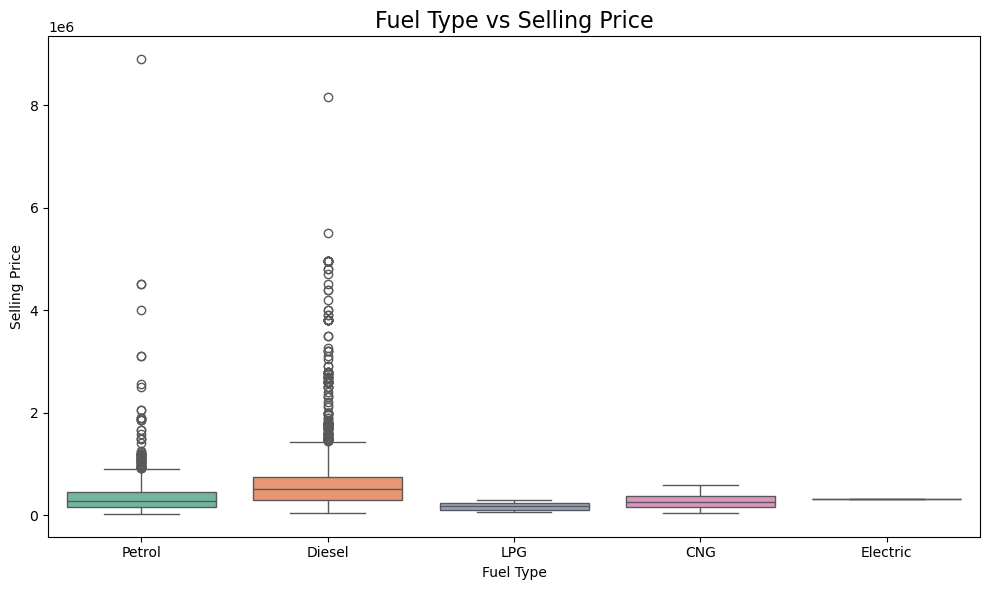

In [16]:
plt.figure(figsize=(10,6))

sns.boxplot(df, x= 'fuel', y = 'selling_price', palette = 'Set2')

plt.title('Fuel Type vs Selling Price', fontsize = 16)

plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')


plt.tight_layout()
plt.show()

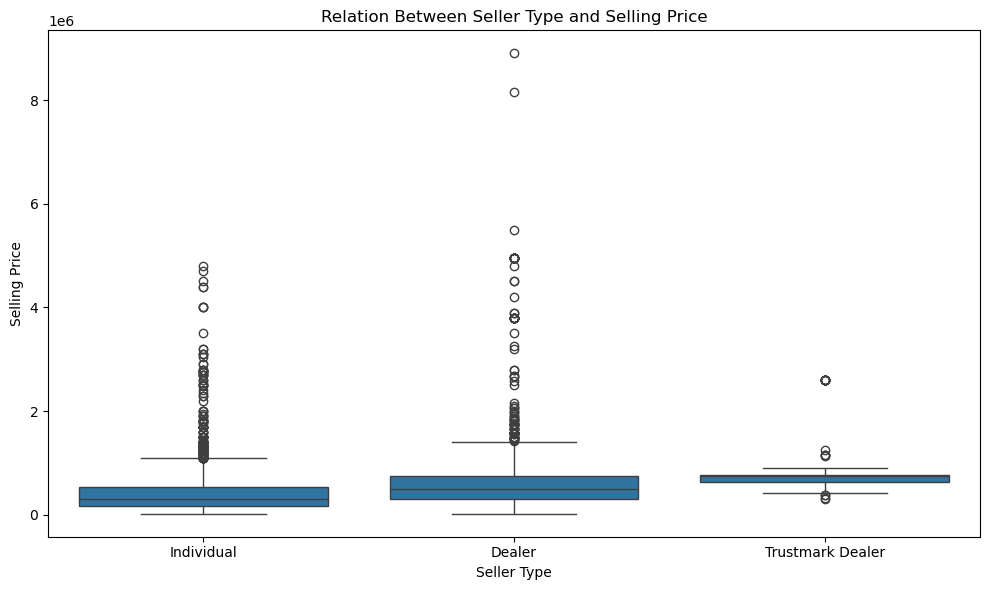

In [43]:
plt.figure(figsize=(10,6))

sns.boxplot(df, x ='seller_type', y = 'selling_price')

plt.title("Relation Between Seller Type and Selling Price")
plt.xlabel("Seller Type")
plt.ylabel("Selling Price")

plt.tight_layout()
plt.show()

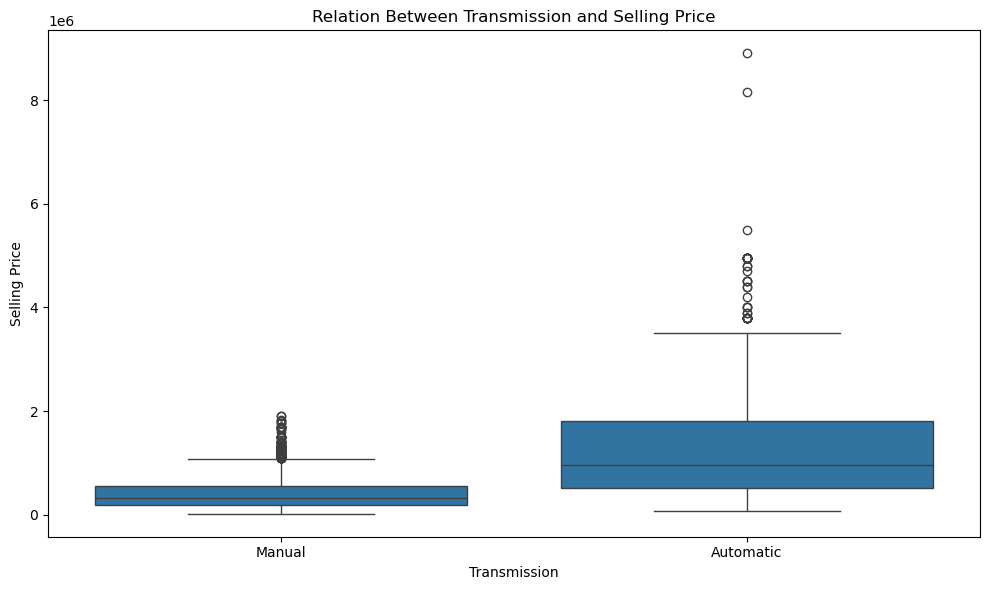

In [51]:
plt.figure(figsize=(10,6))

sns.boxplot(df, x="transmission", y = "selling_price")

plt.title("Relation Between Transmission and Selling Price")
plt.xlabel("Transmission")
plt.ylabel("Selling Price")

plt.tight_layout()
plt.show()

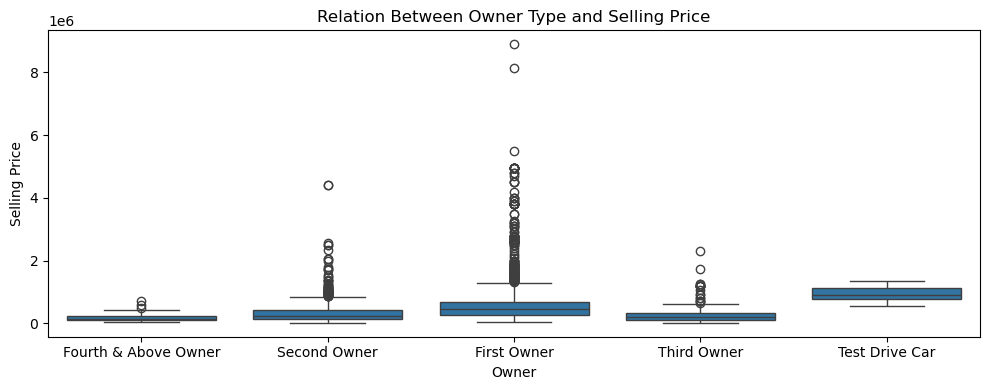

In [55]:
plt.figure(figsize=(10,4))

sns.boxplot(df, x= 'owner', y= 'selling_price')

plt.title("Relation Between Owner Type and Selling Price")
plt.xlabel("Owner")
plt.ylabel("Selling Price")

plt.tight_layout()
plt.show()

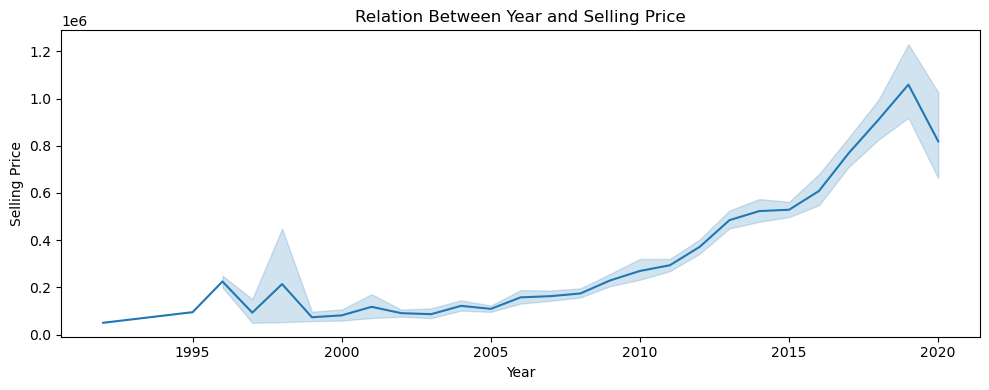

In [59]:
plt.figure(figsize=(10,4))

sns.lineplot(df, x= 'year', y = 'selling_price')

plt.title("Relation Between Year and Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")

plt.tight_layout()
plt.show()

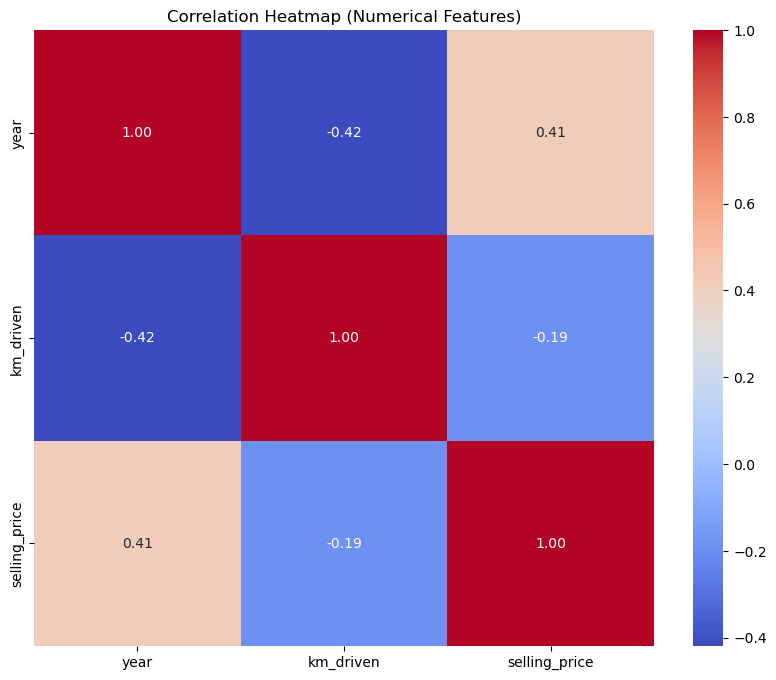

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [18]:
brand_count = df['Brand'].value_counts()
brand_count.columns = ['Brand','Count']
print(brand_count)

Brand
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Ambassador          4
Volvo               4
Jeep                3
OpelCorsa           2
MG                  2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64


In [19]:
engine = create_engine('sqlite:///car_data.db', echo = False) #This creates a SQLite database file called car_data.db.

In [20]:
df.to_sql('cars', con = engine, if_exists = 'replace', index= False)

4340

In [21]:
df_model = pd.read_sql("SELECT * FROM cars WHERE model = 'Swift Dzire VDI' ORDER BY selling_price", con = engine)
print(df_model)

     Brand            model  year  km_driven    fuel seller_type transmission  \
0   Maruti  Swift Dzire VDI  2014      40000  Diesel  Individual       Manual   
1   Maruti  Swift Dzire VDI  2014     107143  Diesel  Individual       Manual   
2   Maruti  Swift Dzire VDI  2012      80000  Diesel  Individual       Manual   
3   Maruti  Swift Dzire VDI  2014      90000  Diesel  Individual       Manual   
4   Maruti  Swift Dzire VDI  2013      55000  Diesel  Individual       Manual   
..     ...              ...   ...        ...     ...         ...          ...   
64  Maruti  Swift Dzire VDI  2019      40000  Diesel  Individual       Manual   
65  Maruti  Swift Dzire VDI  2018      38217  Diesel  Individual       Manual   
66  Maruti  Swift Dzire VDI  2018      15000  Diesel  Individual       Manual   
67  Maruti  Swift Dzire VDI  2018      20000  Diesel  Individual       Manual   
68  Maruti  Swift Dzire VDI  2018      25000  Diesel  Individual       Manual   

           owner  selling_p